<a href="https://colab.research.google.com/github/ericlewisX/trafficsignclassifier/blob/main/Traffic_Signs_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.5.0
Running on TPU  ['10.28.80.2:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.28.80.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.28.80.2:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [2]:
from google.colab import auth
auth.authenticate_user()

In [5]:
!curl https://sdk.cloud.google.com | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   443  100   443    0     0  18458      0 --:--:-- --:--:-- --:--:-- 18458
######################################################################## 100.0%
Running install script from: /tmp/tmp.iMyBzkFa1m/install_google_cloud_sdk.bash
which curl
curl -# -f https://dl.google.com/dl/cloudsdk/channels/rapid/google-cloud-sdk.tar.gz
######################################################################## 100.0%

mkdir -p /root
"/root/google-cloud-sdk" already exists and may contain out of date files.
Remove /root/google-cloud-sdk or select a new installation directory, then run again.


In [6]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'
core:
  account: eric.lewish@gmail.com

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you would like to use to perform operations for 
this configuration:
 [1] eric.lewish@gmail.com
 [2] Log in with a new account
Please enter your numeric choice:  1

You are logged in as: [eric.lewish@gmail.com].

Pick cloud project to use: 
 [1] colorfy

In [7]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list

In [8]:
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0   107k      0 --:--:-- --:--:-- --:--:--  107k
OK


In [9]:
!apt -qq update

98 packages can be upgraded. Run 'apt list --upgradable' to see them.


In [10]:
!apt -qq install gcsfuse

The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 98 not upgraded.
Need to get 10.8 MB of archives.
After this operation, 23.2 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.36.0_amd64.deb ...
Unpacking gcsfuse (0.36.0) ...
Setting up gcsfuse (0.36.0) ...


In [11]:
!mkdir imagedataset

In [17]:
!gcsfuse --implicit-dirs trafficsignclassifier imagedataset/

2021/08/09 10:49:53.231466 Using mount point: /content/imagedataset
2021/08/09 10:49:53.239792 Opening GCS connection...
2021/08/09 10:49:53.448842 Mounting file system "trafficsignclassifier"...
2021/08/09 10:49:53.451434 File system has been successfully mounted.


## TensordBoard and Callbacks

In [1]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [2]:
early_stopping = EarlyStopping(monitor='loss', 
                               patience=5, mode='auto'
                               )
model_checkpoint = ModelCheckpoint(filepath='./drive/MyDrive/Capstone3/TrafficSigns/modelX.h5', 
                                   monitor='val_accuracy', save_best_only=True)
tensor_board = TensorBoard(log_dir="./logs" )

# Imports

In [3]:
## Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import pickle
import random

## Image Related
from PIL import Image
from skimage.io import imsave, imshow

## Sklearn
from sklearn.model_selection import train_test_split

## Tensoflow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Conv2D, UpSampling2D, InputLayer, Dense, \
                                    Conv2DTranspose, MaxPooling2D, Dropout, Flatten, Input
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

path = "imagedataset/TrafficSignClassifier/data/myData/images/"
label_csv = 'imagedataset/TrafficSignClassifier/labels.csv'

In [21]:
def load_data(path):
  '''
  This function loads all the images from all the directories into lists.
  '''
  class_directory_num, image_list, class_, shapes = 0, [], [], []
  list_ = os.listdir(path) # Number of directories in path is synomous with number of classes
  class_count = len(list_)

  for folder in range(len(list_)):

      sign_list = os.listdir(path + '/' + str(class_directory_num))

      for x in sign_list:

        image = cv2.imread(path + '/' + str(class_directory_num) + '/' + x)
        image_list.append(image)
        class_.append(class_directory_num)
        shapes.append(image.shape)

      print(class_directory_num, end = ' ')
      class_directory_num += 1

  images_dataset_list = np.array(image_list)
  class_num = np.array(class_)

  return images_dataset_list, class_num, shapes, class_count


In [22]:
images_dataset_list, class_num, shapes, class_count = load_data(path)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

In [23]:
def save_variables(var_, file_name : str):
  '''
  This function saves variables as binary pickle files for reuse later. This circumvents the
  need to rerun load_data(path) if runtime fails.
  '''
  with open(file_name, 'wb') as f:
    pickle.dump(var_, f)

In [24]:
save_variables(images_dataset_list, 'images_dataset_list.pickle')
save_variables(class_num, 'class_num.pickle')
save_variables(shapes, 'shapes.pickle')
save_variables(class_count, 'class_count.pickle')

In [4]:
def load_variables(file_name : str):
  '''
  This function loads variables from a binary pickle file.
  '''
  with open(file_name, 'rb') as f:
    var_ = pickle.load(f)

  return var_

In [5]:
images_dataset_list = load_variables('images_dataset_list.pickle')
class_num = load_variables('class_num.pickle')
shapes = load_variables('shapes.pickle')
class_count = load_variables('class_count.pickle')

In [6]:
def data_split(images_dataset, class_num):
  '''
  This function splits our data with a train test split.  
  '''
  X_train, X_test, y_train, y_test = train_test_split(images_dataset, class_num, test_size=0.2)
  
  return X_train, X_test, y_train, y_test
 

In [45]:
import sys
sys.setrecursionlimit(1500)

In [7]:
X_train, X_test, y_train, y_test  = data_split(images_dataset_list, class_num)

In [8]:
def train_validation_split(X_train, y_train, validation_size = 0.2):

  '''
  [This function splits our data with a train validation split. ]

  Returns
  -------
  [type] - X_train
      [description]
  [type] - X_validation
      [description]
  [type] - y_train
      [description]
  [type] - y_validation
      [description]
  '''

  X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = validation_size)
 
  return X_train, X_validation, y_train, y_validation 
 
 

In [9]:
X_train, X_validation, y_train, y_validation = train_validation_split(X_train, y_train)

In [10]:
def labels_df(label_file):

  ''' 
  '''
  data = pd.read_csv(label_file)
  return data

In [13]:
data = labels_df(label_csv)

In [ ]:
num_of_samples = []
cols = 5
class_count = class_count
fig, axs = plt.subplots(nrows = class_count, ncols = cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        # axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        # axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))

In [15]:
def grayscale(img):
    img = img.astype(np.float32)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_expanded = gray[:, :, np.newaxis]
    return img_expanded

def equalize(img):
    img1 = np.uint8(cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX))
    img = cv2.equalizeHist(img1)
    return img

def preprocessing(img):

  img = grayscale(img)     
  img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
  img = img/255    
  return img
  

In [16]:
X_train = np.array(list(map(preprocessing,X_train)))  # TO IRETATE AND PREPROCESS ALL IMAGES


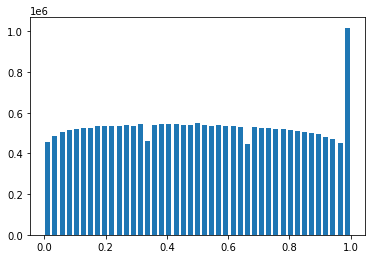

In [18]:
# histogram of label frequency
hist, bins = np.histogram(X_train, class_count)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align = 'center', width = width)
plt.show()

In [19]:
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))

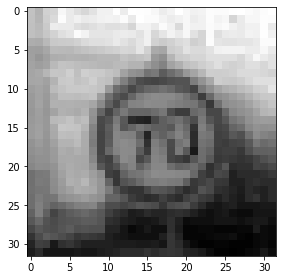

In [29]:
# Random Image, Lightened, and Grayscaled
imshow(X_train[random.randint(0,len(X_train)-1)]) 

In [30]:
def depth_adder(X_train, X_validation, X_test):
  X_train = X_train.reshape(X_train.shape[0], 
                            X_train.shape[1], 
                            X_train.shape[2], 1)
  X_validation = X_validation.reshape(X_validation.shape[0], 
                                      X_validation.shape[1], 
                                      X_validation.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0],
                          X_test.shape[1],
                          X_test.shape[2], 1)
  
  return X_train, X_validation, X_test

In [31]:
X_train, X_validation, X_test = depth_adder(X_train, X_validation, X_test)

In [32]:
# Image augmenter
augmenter = ImageDataGenerator(width_shift_range = 0.1, 
                            height_shift_range = 0.1,
                            zoom_range = 0.2, 
                            shear_range = 0.1,
                            rotation_range = 10) 
augmenter.fit(X_train)
batches = augmenter.flow(X_train, y_train, batch_size = 20) 
X_batch, y_batch = next(batches)

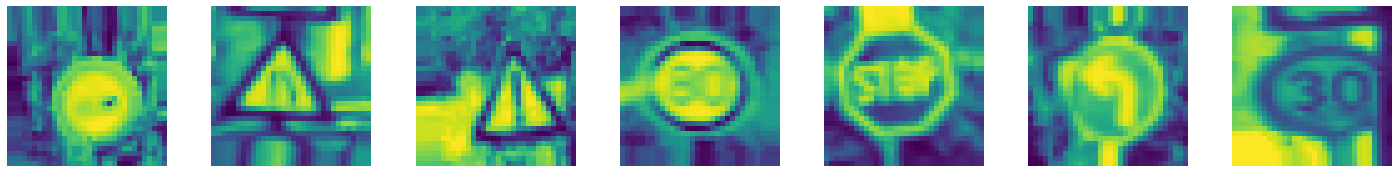

In [36]:
# Show some images
fig,axs=plt.subplots(1,7,figsize=(20,5))
fig.tight_layout()
imageDim = (32,32,3)
for i in range(7):
    axs[i].imshow(X_batch[i].reshape(imageDim[0],imageDim[1]))
    axs[i].axis('off')
plt.show()

In [38]:
y_train, y_validation, y_test = to_categorical(y_train, class_count), to_categorical(y_validation, class_count), to_categorical(y_test, class_count)


In [41]:
# Model

model= keras.models.Sequential()
model.add((Conv2D(60, (5,5) , input_shape = (imageDim[0], 
                                             imageDim[1],1), 
                                                activation='relu'))) 
model.add((Conv2D(60, (5,5) , activation='relu')))
model.add(MaxPooling2D(pool_size = (2,2))) 

model.add((Conv2D(60 // 2, (3,3), activation='relu')))
model.add((Conv2D(60 // 2, (3,3), activation='relu')))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500, activation ='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(class_count, activation ='softmax')) # ouput layer

# COMPILE MODEL
model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [46]:
# Fit
batch_size_val = 50
steps_per_epoch_val = len(X_train) // batch_size_val
epochs_val = 50

history = model.fit(X_train, y_train, 
                    batch_size = batch_size_val,
                    steps_per_epoch = steps_per_epoch_val,
                    epochs = epochs_val,
                    shuffle = 1, 
                    validation_data=(X_validation,y_validation),
                    callbacks=[early_stopping, model_checkpoint], verbose = 1)
                            

Epoch 1/50
445/445 [==============================] - 230s 516ms/step - loss: 0.2607 - accuracy: 0.9192 - val_loss: 0.0835 - val_accuracy: 0.9768
Epoch 2/50
445/445 [==============================] - 228s 513ms/step - loss: 0.2081 - accuracy: 0.9347 - val_loss: 0.0854 - val_accuracy: 0.9741
Epoch 3/50
445/445 [==============================] - 228s 512ms/step - loss: 0.1786 - accuracy: 0.9432 - val_loss: 0.0690 - val_accuracy: 0.9797
Epoch 4/50
445/445 [==============================] - 229s 514ms/step - loss: 0.1768 - accuracy: 0.9414 - val_loss: 0.0611 - val_accuracy: 0.9844
Epoch 5/50
445/445 [==============================] - 226s 509ms/step - loss: 0.1533 - accuracy: 0.9508 - val_loss: 0.0602 - val_accuracy: 0.9802
Epoch 6/50
445/445 [==============================] - 228s 511ms/step - loss: 0.1310 - accuracy: 0.9567 - val_loss: 0.0433 - val_accuracy: 0.9885
Epoch 7/50
445/445 [==============================] - 226s 508ms/step - loss: 0.1248 - accuracy: 0.9606 - val_loss: 0.0534 -

In [47]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 30)         

In [48]:
# Save
model.save('drive/MyDrive/Capstone3/TrafficSigns/trafficSignModel.h5')

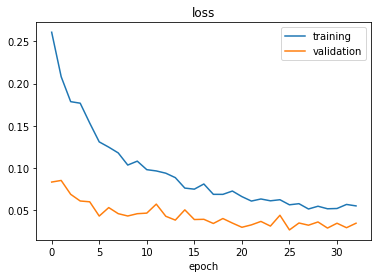

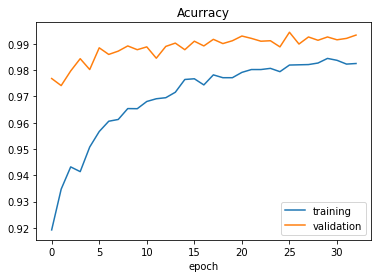

Test Score: 0.025333134457468987
Test Accuracy: 0.9943965673446655


In [49]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])
 